In [1]:
source('../../helper/PRS_residuals_misc.R')
source('performance_plot_misc.R')


In [2]:
repo_root <- normalizePath('../../')
out_dir <- 'biomarker_paper'


In [3]:
dataset_list <- list(
#     'snpnet_biomarker' = c('biomarkers_20190407', 'biomarkers_20190407_multi_ethnic')
    'snpnet_biomarker' = c('biomarkers_20190407')    
)

final_list <- fread(
    'list_of_phes.txt', head=FALSE
)
colnames(final_list) <- c('GBE_ID')


In [4]:
df <- dataset_list %>% read_all_data(repo_root) %>% 
inner_join(final_list) %>% 
replace_na(list(Population = 'white_british')) %>%
select(-method, -PRS_model, -dataset_name, -dataset_version, -dataset_full)


Joining, by = "GBE_ID"


In [5]:
df %>% dim() %>% print()
df %>% select(GBE_ID) %>% unique() %>% count() %>% print()


[1] 570   5
# A tibble: 1 x 1
      n
  <int>
1    38


In [8]:
df_tabulated_full <- df %>% tabulate_df()


In [6]:
p1 <- df %>% plot_bar_performance()


In [9]:
p2 <- df_tabulated_full %>% plot_trans_ethnic_delta()


In [10]:
task_INT <- 'snpnet_biomarker_PRS/biomarkers_20190407_INT'
task     <- 'snpnet_biomarker_PRS/biomarkers_20190407'

covar_df <- file.path(
    '/oak/stanford/groups/mrivas/users/ytanigaw', 
    '/repos/rivas-lab/PRS/notebook/', 
    '20190406_biomarker_covar/biomarker_covar.tsv'
) %>% fread(data.table=F)


In [13]:
phe_name_INT <- 'Lipoprotein_A.adjust.statins'
phe_name <- 'Lipoprotein_A_adjstatins'
rda_iter <- 100

file_names_Lipoprotein_A     <- get_file_names(task, phe_name, rda_iter = rda_iter)
file_names_Lipoprotein_A_INT <- get_file_names(task_INT, phe_name_INT)

phe_name_INT <- 'LDL_direct.adjust.statins'
phe_name <- 'LDL_direct_adjstatins'
rda_iter <- 35

file_names_LDL     <- get_file_names(task, phe_name, rda_iter = rda_iter)
file_names_LDL_INT <- get_file_names(task_INT, phe_name_INT)


In [15]:
file_names <- file_names_Lipoprotein_A
data_Lipoprotein_A <- read_data_with_covars(
    file_names[['phe']], file_names[['score']], 
    file_names[['rda']], covar_df, file_names[['covar_beta']], 
    file_names[['test']]
)

file_names_INT <- file_names_Lipoprotein_A_INT
data_Lipoprotein_A_INT <- read_data(
    file_names_INT[['phe']], file_names_INT[['score']], file_names_INT[['test']]
)

[1] "correlation: 0.74878588251925"
[1] "correlation: 0.680159133329576"


In [16]:
file_names <- file_names_LDL
data_LDL <- read_data_with_covars(
    file_names[['phe']], file_names[['score']], 
    file_names[['rda']], covar_df, file_names[['covar_beta']], 
    file_names[['test']]
)

file_names_INT <- file_names_LDL_INT
data_LDL_INT <- read_data(
    file_names_INT[['phe']], file_names_INT[['score']], file_names_INT[['test']]
)

[1] "correlation: 0.427708314905197"
[1] "correlation: 0.449175432626993"


In [22]:
p3 <- data_Lipoprotein_A %>% plot_scatter()
p4 <- data_LDL %>% plot_scatter()

In [23]:
plot_width <- 12
plot_height <- 12

Warning message:
“Removed 9 rows containing missing values (geom_point).”Warning message:
“Removed 9 rows containing missing values (geom_text_repel).”

[1] "saving the results to ..."
[1] "biomarker_paper/snpnet_combined_all.pdf"


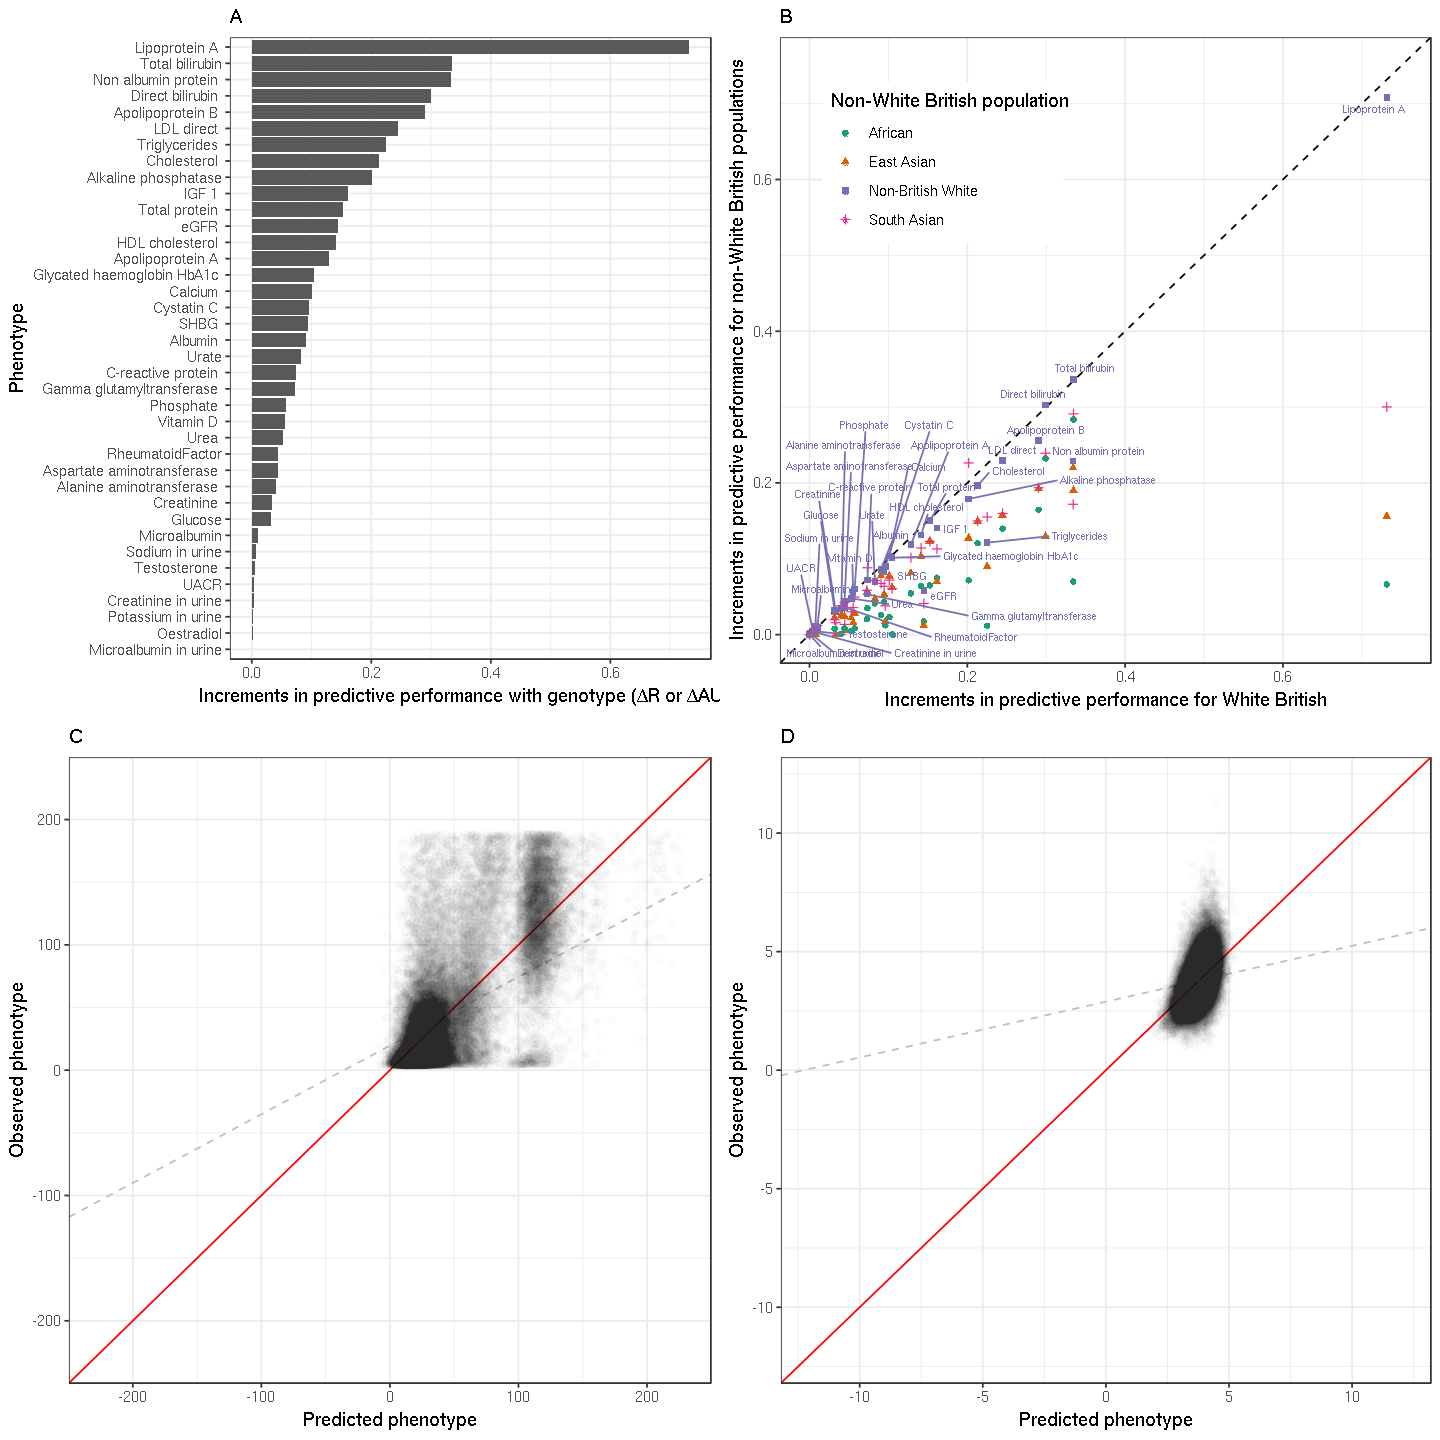

In [24]:
options(repr.plot.width=plot_width , repr.plot.height=plot_height)
p_combined <- grid.arrange(
    p1  + labs(title='A'), 
    p2  + labs(title='B'), 
    p3  + labs(title='C'), 
    p4  + labs(title='D'), 
    widths = c(1, 1), nrow = 2
)
print('saving the results to ...')
out_f <- file.path(out_dir, 'snpnet_combined_all.pdf')
print(out_f)
ggsave(out_f, p_combined, width=plot_width, height=plot_height)    
